In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
for_sale = pd.read_csv('for_sale.csv', index_col = [0])
for_sale.head()

,address,zip,building_type,price,beds,baths,sqft,price/sqft,agent,brokerage
0,710 London St,94112,- House for sale,1498000,4,3,2047,731.802638,Darin J. Holwitz,COMPASS
1,655 27th St,94131,- House for sale,2195000,3,3,1791,1225.572306,Dale T. Boutiette,COMPASS SF
2,270 Sadowa St,94112,- House for sale,1049000,3,2,1264,829.905063,Cynthia M. Pagan,PACIFIC EDGE
3,437 Valley St,94131,- House for sale,2000000,3,2,1949,1026.167265,Allison Fortini Crawford,SOTHEBY'S INTERNATIONAL REALTY
4,585 Rockdale Dr,94127,- House for sale,1295000,2,1,1152,1124.131944,Edward O'Connell,CORCORAN GLOBAL LIVING


# Property Types

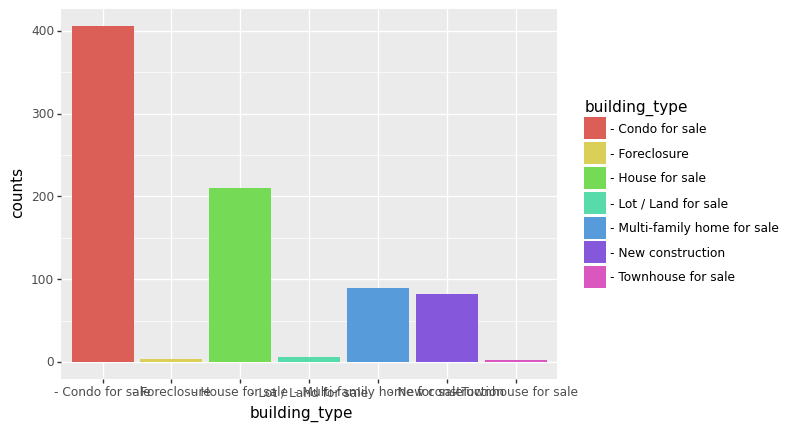

<ggplot: (297121786)>

In [3]:
fs_bt = for_sale['building_type'].value_counts().rename_axis('building_type').reset_index(name='counts')

gg = p9.ggplot(fs_bt)
gg += p9.aes(x='building_type',y = 'counts', fill = 'building_type')
gg += p9.geom_bar(stat = 'identity') 
gg

From the for sale listings, we can see that the most common property type being sold is a condo, followed by houses and multi family homes for sale.

# For Sale Listings By ZIP Code

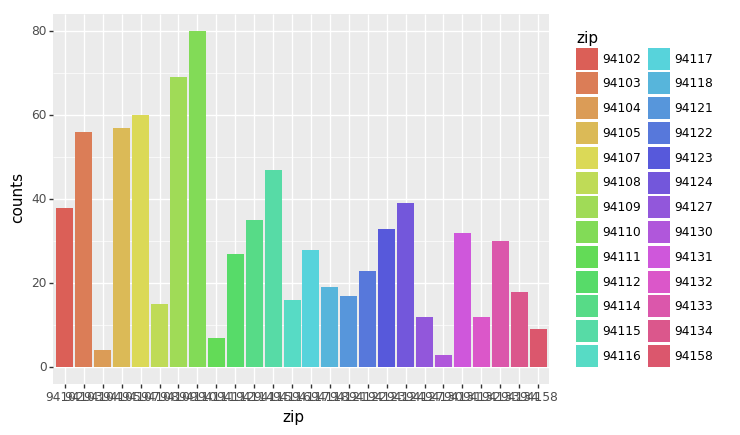

<ggplot: (297423258)>

In [4]:
fs_zip = for_sale['zip'].value_counts().rename_axis('zip').reset_index(name='counts')
not_zip=['BMR', 'Serif', '555', 'Portola', 'OneEleven', 'MIRA', 'Monarch']
fs_zip = fs_zip[~fs_zip['zip'].isin(not_zip)]

gg = p9.ggplot(fs_zip)
gg += p9.aes(x='zip',y = 'counts', fill = 'zip')
gg += p9.geom_bar(stat = 'identity') 
gg

From this bar graph, we can clearly see that some zip codes have more listings than other zip codes. The zip code with the highest amount of listings is 94110, which corresponds to the Mission District. 

# Average Listing Price By ZIP Code

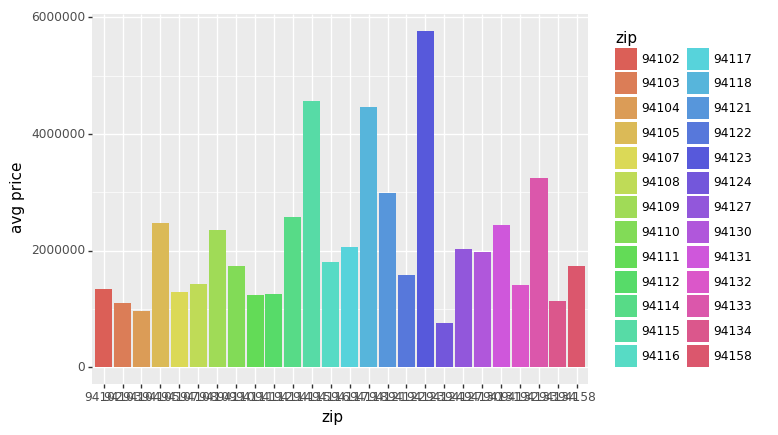

<ggplot: (298547676)>

In [21]:
zip_mean = for_sale.groupby('zip').price.mean().rename_axis('zip').reset_index(name='avg price') 
zip_mean = zip_mean[~zip_mean['zip'].isin(not_zip)]

gg = p9.ggplot(zip_mean)
gg += p9.aes(x='zip',y = 'avg price', fill = 'zip')
gg += p9.geom_bar(stat = 'identity') 
gg

In [39]:
for_sale['price'].describe().astype('int64')

count         800
mean      2191532
std       3197488
min          3300
25%        825000
50%       1299000
75%       1995500
max      29500000
Name: price, dtype: int64

The average listing price is 2,191,533 however the median listing price is 1,299,000. The difference between the median and mean is so large because of listings found in 94123, the most expesnive area on average.   

# Brokerage Listing Count

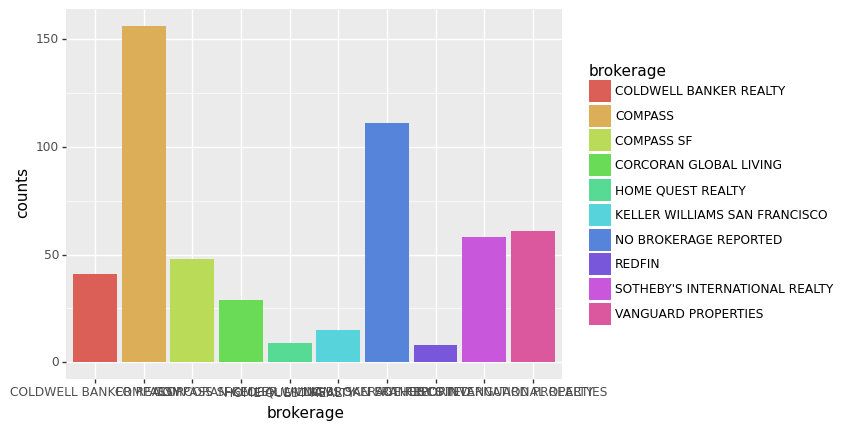

<ggplot: (297405275)>

In [5]:
fs_bk= for_sale['brokerage'].value_counts().rename_axis('brokerage').reset_index(name='counts')
fs_bk['brokerage'].replace({'0':'NO BROKERAGE REPORTED'}, inplace=True)
gg = p9.ggplot(fs_bk[:10])
gg += p9.aes(x='brokerage',y = 'counts', fill = 'brokerage')
#gg += p9.geom_histogram() 
gg += p9.geom_bar(stat = 'identity') 
gg

In this bar graph, we are only looking at the ten most successful brokerages. Compass is by far the most dominant brokerage in San Francisco. At about 3 times less than the number of Compass listings, Vangaurd Properties and Sotheby's International Realty come in at second and third. 

# Average Listing Price By Brokerage

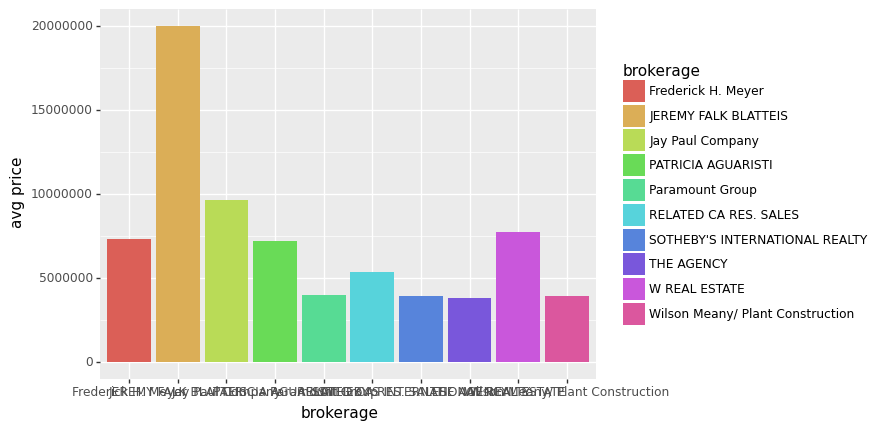

<ggplot: (297626085)>

In [6]:
brokerage_mean = for_sale.groupby('brokerage').price.mean().rename_axis('brokerage').reset_index(name='avg price') 
not_brokerage = ['0']
brokerage_mean = brokerage_mean[~brokerage_mean['brokerage'].isin(not_brokerage)]
brokerage_mean = brokerage_mean.sort_values(['avg price'], ascending = False)

#gg = p9.ggplot(brokerage_mean)
gg = p9.ggplot(brokerage_mean[:10])
gg += p9.aes(x='brokerage',y = 'avg price', fill = 'brokerage')
gg += p9.geom_bar(stat = 'identity') 
gg

Here we can see that the real estate brokerage company called 'Jeremy Falk Blatteis' has the highest average listing price of homes for sale. 

# Agent Listing Count

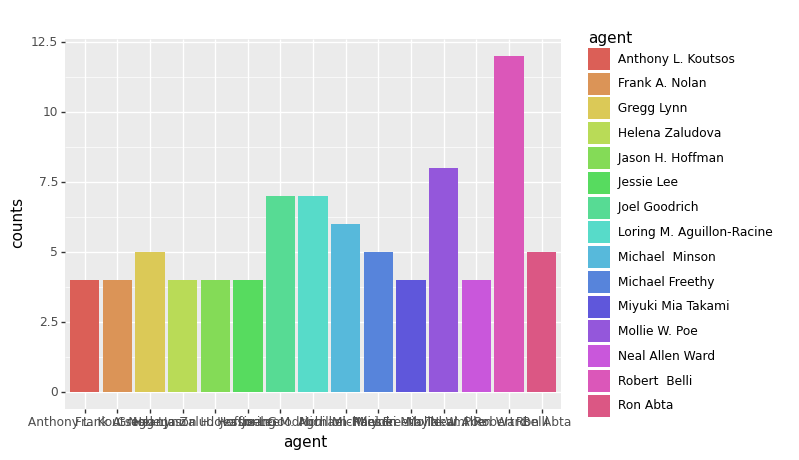

<ggplot: (297924048)>

In [8]:
fs_ag= for_sale['agent'].value_counts().rename_axis('agent').reset_index(name='counts')
fs_ag['agent'].replace({'0':'NO AGENT REPORTED'}, inplace=True)
not_agents = ['NO AGENT REPORTED', ' INC.', ' COMPASS', ' INC', ' POLARIS PACIFIC', ' BROKER']
fs_ag= fs_ag[~fs_ag['agent'].isin(not_agents)]
fs_ag
gg = p9.ggplot(fs_ag[:15])
gg += p9.aes(x='agent',y = 'counts', fill = 'agent')
gg += p9.geom_bar(stat = 'identity') 
gg

Currently the agent Robert Belli has the highest amount of listings with a count of 12 in San Francisco. 

# Heat Map

In [10]:
heat = for_sale[['zip', 'price', 'beds', 'baths', 'sqft', 'building_type']]

# not zips
heat = heat[~heat['zip'].isin(not_zip)]
# not beds
not_beds=['4,996 sqft lot', '1,470 sqft lot', '5.72 acres lot', '2,496 sqft lot','1.15 acres lot','2,788 sqft lot','--','Studio', '84 ']
heat = heat[~heat['beds'].isin(not_beds)]
# not baths
not_baths=['-- ']
heat = heat[~heat['baths'].isin(not_baths)]
# not sqft
not_sqft=['0']
heat = heat[~heat['sqft'].isin(not_sqft)]

build_comp = heat[['price','sqft', 'beds', 'baths' ,'zip', 'building_type']]

heat= heat[['price','sqft', 'beds', 'baths']].astype('int64')
#heat

Text(0.5, 1.0, 'Correlation Between Features')

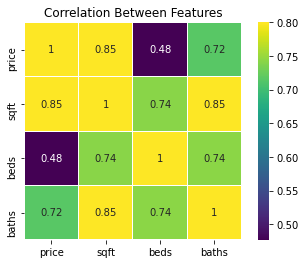

In [11]:
sns.heatmap(heat.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation Between Features')

In both listings that had sold and are currently for sale, we saw that square footage had the strongest correlation with a property's listing/sold at price. From this, it is apparent that prices for property listings in San Francisco is most affected by the total amount of square footage the property has, followed by the number of bathrooms, number of bedrooms, and lastly zip code

# Linear Regression on Price and Square Feet

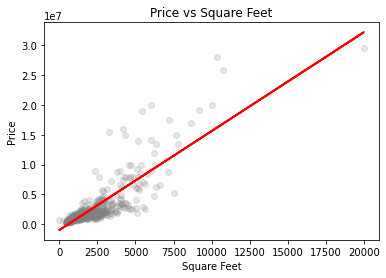

In [17]:
length = len(build_comp['price'])
x = build_comp[['sqft']]
y = build_comp[['price']]
reg = LinearRegression()
reg.fit(x,y)

plt.scatter(x, y,  color='grey', alpha =0.2)
plt.plot(x, reg.predict(x), color='red', linewidth=2)
plt.title('Price vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

From our linear regression result by analyzing price vs sqft, we can see that there is a postitive realtionship between the two variables. This is supported by our heat map that indicates a correlation of 0.85 between the two variables

# Price vs Zip

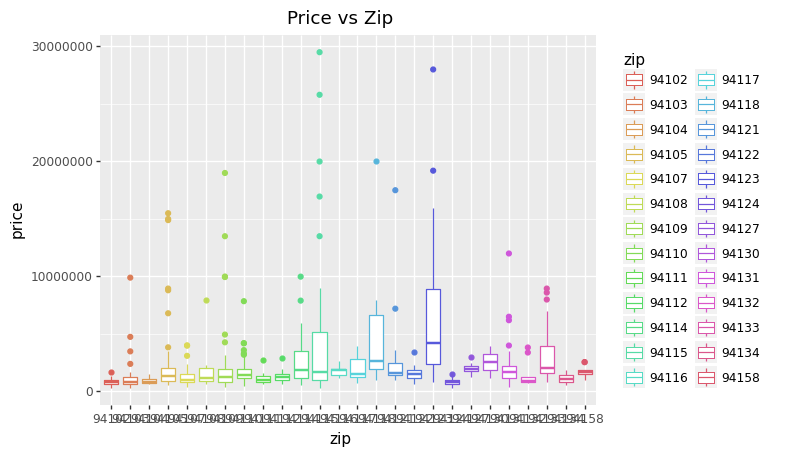

<ggplot: (298766102)>

In [18]:
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='zip',
                          y='price', color='zip'))
    + p9.geom_boxplot()
  + p9.labs(title="Price vs Zip")
)

We can see that the zip code 94123 had the highest average price for listing for sale on Zillow (and largest range for prices, which makes sense as this area borders the beach and neighbors the Golden Gate Bridge), followed by zip codes 94118 and 94130.

# Price By Building Type

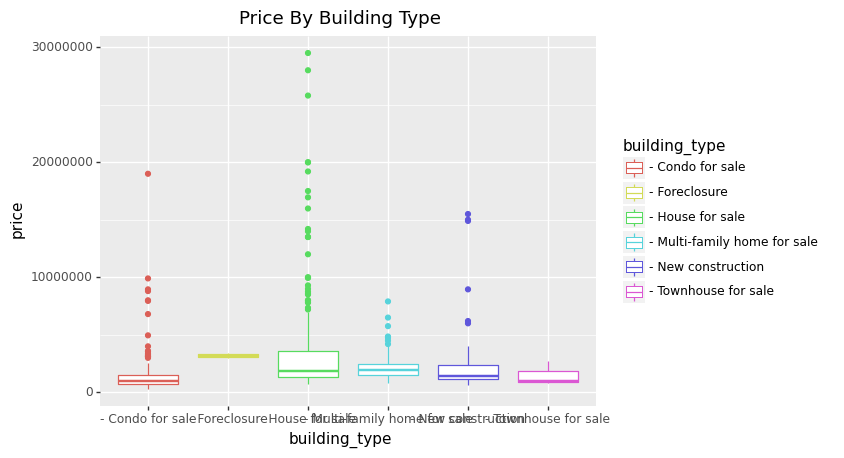

<ggplot: (302141489)>

In [475]:
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='building_type',
                          y='price', color='building_type'))
    + p9.geom_boxplot()
    + p9.labs(title="Price By Building Type")
)

# Square Feet By Building Type

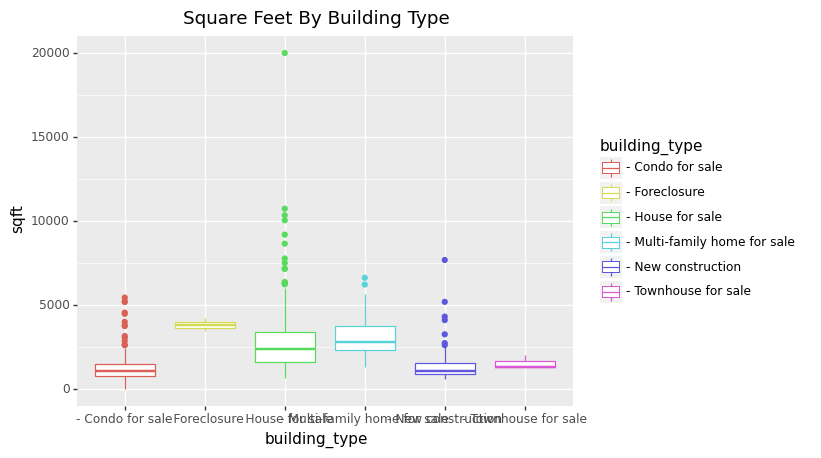

<ggplot: (302169540)>

In [476]:
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='building_type',
                          y='sqft', color='building_type'))
    + p9.geom_boxplot()
 + p9.labs(title="Square Feet By Building Type")
)

We can see that homes that were foreclosed upon had the highest price and amount of square footage with condos being the lowest.

In [477]:
#build_comp.dtypes

In [478]:
#build_comp = build_comp.astype({"beds": int, "baths": int, "zip": int})
#build_comp

# Price by # of Baths 

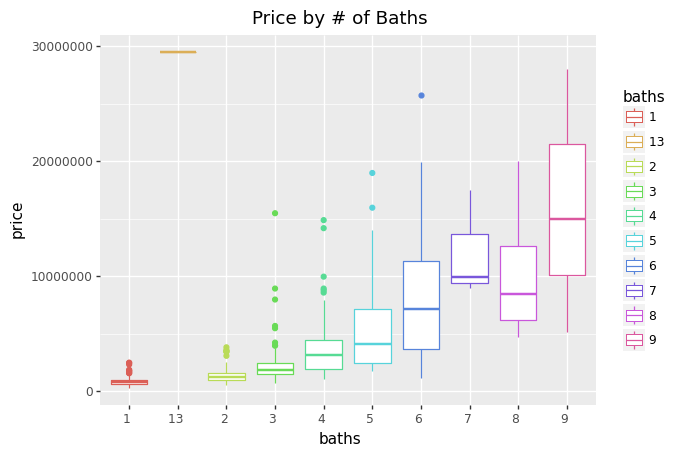

<ggplot: (298822214)>

In [19]:
(p9.ggplot(data=build_comp,
          mapping=p9.aes(x='baths',
                          y='price', color='baths'))
    + p9.geom_boxplot()
 + p9.labs(title="Price by # of Baths")
)

Price steadily increases as the the number of baths increases. 

# Price By # of Beds

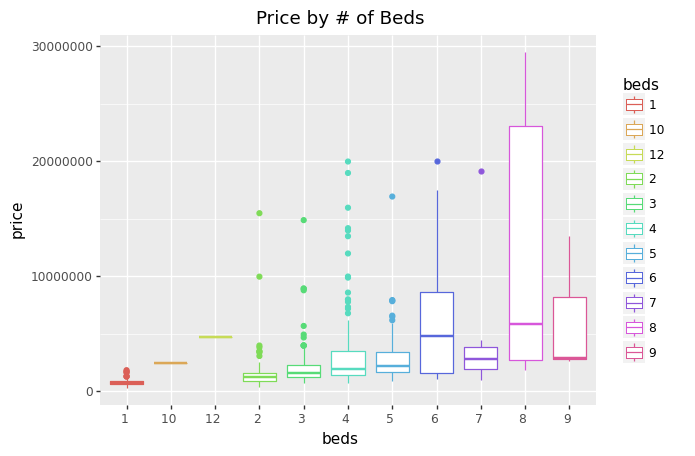

<ggplot: (300819878)>

In [480]:
build_comp['beds']
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='beds',
                          y='price', color='beds'))
    + p9.geom_boxplot()
 + p9.labs(title="Price by # of Beds")
)

Price stadily increases as the number of beds increases. However, we can see that the number of baths gives a more aggressive increase in price. This is supported by our heatmap which shows price having a higher correlation with baths than with beds. 

# Price vs Square Feet By Building Type

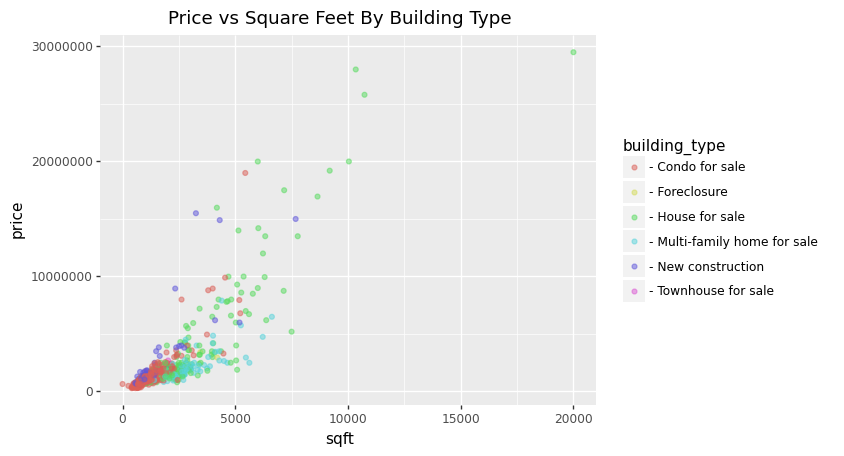

<ggplot: (300158615)>

In [465]:
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='sqft',
                          y='price',
                          color='building_type'))
    + p9.geom_point(alpha=0.5)
 + p9.labs(title="Price vs Square Feet By Building Type")
)

With this scatter plot, we can see that the new construction homes may have a higher price per square feet compared to other building types, as evident by the purple dots. Surprisingly, it looks like houses and mulit family homes are similarly priced. 

# Price vs Square Feet By Area Code

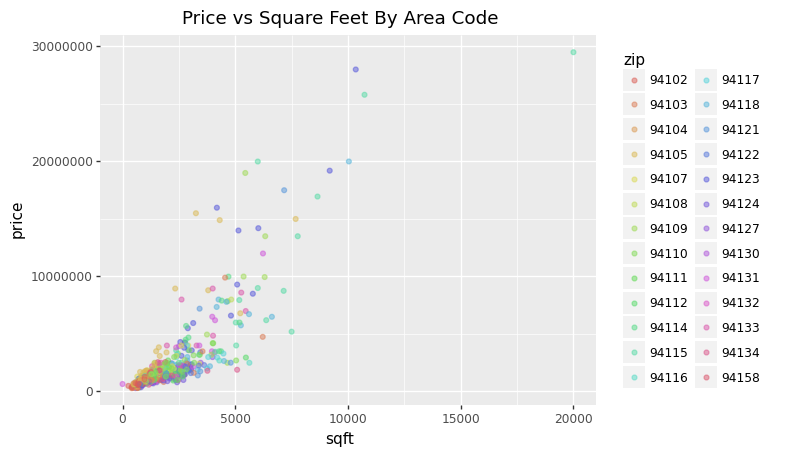

<ggplot: (299484772)>

In [466]:
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='sqft',
                          y='price',
                          color='zip'))
    + p9.geom_point(alpha=0.5)
 + p9.labs(title="Price vs Square Feet By Area Code")
)

# Conclusion

From our findings, we saw that square footage had the most impact on the price of a property on Zillow.com in San Francisco in June 2021. We also saw that Zillow had more listings for sale from the 94110 zip code in San Francisco, which is located in the Inner Mission/Bernal Heights district. We also showed that San Francisco had more condos for sale than any other type of property, which makes sense with San Francisco's current dense neighborhoods.

It would be interesting to use our model to predict what homes were likely to be sold/rented out next based on our previous findings. Real estate companies could also use our findings to better understand what factors should be included in their listing in order to make the property more likely to sell or be rented out, such as the total amount of square footage. Buyers anf individuals looking to work into reltionship can use this valuable data. 

Some caveats to our approach would be that we did not compare it to a different year's housing market, such as prices for San Francisco listings before the COVID-19 pandemic--which had a major impact on the housing market. We were also limited to what Zillow had available on their website: 800 results per each search result (i.e. 800 listings San Francisco homes sold in the past month and 800 listings for homes currently for sale), and these search results only provided the aforementioned variables. It would be better if more data could be extracted. Such as lot size, garage info, pool info, HOA fee, and etc. This would allow us to better understand what influences housing price more and will allow deeper analysis to be conducted. 